# 1. Install and Import Dependencies

In [1]:
!pip install tensorflow tensorflow-gpu==2.5.0 opencv-python mediapipe sklearn matplotlib

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Detect Face, Hand and Pose Landmarks 

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [8]:
cap.release()
cv2.destroyAllWindows()

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(frame, results)

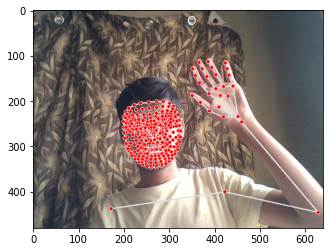

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoints

In [13]:
len(results.left_hand_landmarks.landmark)

21

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [16]:
if results.face_landmarks:
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
else:
    np.zeros(1404)

In [17]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [18]:
result_test = extract_keypoints(results)

In [19]:
result_test

array([ 0.41899371,  0.59564322, -0.78021687, ...,  0.        ,
        0.        ,  0.        ])

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.41899371,  0.59564322, -0.78021687, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Data Collection

In [22]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [23]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Sequences

In [24]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [25]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels

In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [27]:
label_map = {label:num for num, label in enumerate(actions)}

In [28]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [29]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [30]:
np.array(sequences).shape

(90, 30, 1662)

In [31]:
np.array(labels).shape

(90,)

In [32]:
X = np.array(sequences)

In [33]:
X.shape

(90, 30, 1662)

In [34]:
y = to_categorical(labels).astype(int)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [36]:
y_test.shape

(5, 3)

# 7. Build and Train an LSTM Deep Learning Model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [38]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [39]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [40]:
res = [.7, 0.2, 0.1]

In [41]:
actions[np.argmax(res)]

'hello'

In [42]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [43]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 10s 641ms/step - loss: 1.6368 - categorical_accuracy: 0.2941
Epoch 2/2000
3/3 [==============================] - 0s 119ms/step - loss: 2.7973 - categorical_accuracy: 0.2588
Epoch 3/2000
3/3 [==============================] - 0s 123ms/step - loss: 10.2034 - categorical_accuracy: 0.3765
Epoch 4/2000
3/3 [==============================] - 0s 121ms/step - loss: 3.9027 - categorical_accuracy: 0.2353
Epoch 5/2000
3/3 [==============================] - 0s 114ms/step - loss: 2.3907 - categorical_accuracy: 0.3882
Epoch 6/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.6978 - categorical_accuracy: 0.3647
Epoch 7/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.4670 - categorical_accuracy: 0.4588
Epoch 8/2000
3/3 [==============================] - 0s 115ms/step - loss: 2.0097 - categorical_accuracy: 0.4706
Epoch 9/2000
3/3 [==============================] - 0s 113ms/step - loss: 3.0618 - categorical_accurac

3/3 [==============================] - 0s 122ms/step - loss: 2.8319 - categorical_accuracy: 0.2706
Epoch 74/2000
3/3 [==============================] - 0s 124ms/step - loss: 3.1385 - categorical_accuracy: 0.3647
Epoch 75/2000
3/3 [==============================] - 0s 116ms/step - loss: 3.1611 - categorical_accuracy: 0.3294
Epoch 76/2000
3/3 [==============================] - 0s 122ms/step - loss: 2.8692 - categorical_accuracy: 0.3176
Epoch 77/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.6425 - categorical_accuracy: 0.3647
Epoch 78/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.7235 - categorical_accuracy: 0.3882
Epoch 79/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.4321 - categorical_accuracy: 0.3294
Epoch 80/2000
3/3 [==============================] - 0s 138ms/step - loss: 1.5535 - categorical_accuracy: 0.2588
Epoch 81/2000
3/3 [==============================] - 0s 114ms/step - loss: 1.3075 - categorical_accuracy: 0.30

3/3 [==============================] - 0s 121ms/step - loss: 1.0649 - categorical_accuracy: 0.2941
Epoch 146/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.2013 - categorical_accuracy: 0.4235
Epoch 147/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.1067 - categorical_accuracy: 0.3529
Epoch 148/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.0181 - categorical_accuracy: 0.5647
Epoch 149/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.0507 - categorical_accuracy: 0.5412
Epoch 150/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.0415 - categorical_accuracy: 0.4824
Epoch 151/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.9915 - categorical_accuracy: 0.5882
Epoch 152/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.0081 - categorical_accuracy: 0.4706
Epoch 153/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.9599 - categorical_accura

Epoch 217/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.6888 - categorical_accuracy: 0.5882
Epoch 218/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.6437 - categorical_accuracy: 0.6471
Epoch 219/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.6390 - categorical_accuracy: 0.6706
Epoch 220/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.6582 - categorical_accuracy: 0.6118
Epoch 221/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.6262 - categorical_accuracy: 0.6235
Epoch 222/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.6514 - categorical_accuracy: 0.5647
Epoch 223/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.6471 - categorical_accuracy: 0.5529
Epoch 224/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.6136 - categorical_accuracy: 0.5294
Epoch 225/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.6446 - cat

3/3 [==============================] - 0s 117ms/step - loss: 0.5808 - categorical_accuracy: 0.6588
Epoch 289/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.5978 - categorical_accuracy: 0.6588
Epoch 290/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.5861 - categorical_accuracy: 0.6118
Epoch 291/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.5741 - categorical_accuracy: 0.6941
Epoch 292/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.5968 - categorical_accuracy: 0.6588
Epoch 293/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.6393 - categorical_accuracy: 0.6000
Epoch 294/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.6121 - categorical_accuracy: 0.5882
Epoch 295/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.5947 - categorical_accuracy: 0.6588
Epoch 296/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.6449 - categorical_accura

Epoch 360/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.5797 - categorical_accuracy: 0.6588
Epoch 361/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.5885 - categorical_accuracy: 0.6706
Epoch 362/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.5783 - categorical_accuracy: 0.6353
Epoch 363/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.5583 - categorical_accuracy: 0.7294
Epoch 364/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.5663 - categorical_accuracy: 0.6235
Epoch 365/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.5609 - categorical_accuracy: 0.7412
Epoch 366/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.5609 - categorical_accuracy: 0.7294
Epoch 367/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.5585 - categorical_accuracy: 0.6706
Epoch 368/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.5712 - cat

3/3 [==============================] - 0s 111ms/step - loss: 0.5454 - categorical_accuracy: 0.7176
Epoch 432/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.6032 - categorical_accuracy: 0.6000
Epoch 433/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.5619 - categorical_accuracy: 0.7529
Epoch 434/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.5392 - categorical_accuracy: 0.7529
Epoch 435/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.5626 - categorical_accuracy: 0.7059
Epoch 436/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.5323 - categorical_accuracy: 0.8118
Epoch 437/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.5668 - categorical_accuracy: 0.6941
Epoch 438/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.5450 - categorical_accuracy: 0.8000
Epoch 439/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.5405 - categorical_accura

Epoch 503/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.6143 - categorical_accuracy: 0.7647
Epoch 504/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.8278 - categorical_accuracy: 0.6706
Epoch 505/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.7856 - categorical_accuracy: 0.6353
Epoch 506/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.7401 - categorical_accuracy: 0.6353
Epoch 507/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.6765 - categorical_accuracy: 0.6000
Epoch 508/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.6432 - categorical_accuracy: 0.6353
Epoch 509/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.5680 - categorical_accuracy: 0.8235
Epoch 510/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.5655 - categorical_accuracy: 0.6706
Epoch 511/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.5054 - cat

3/3 [==============================] - 0s 115ms/step - loss: 0.5201 - categorical_accuracy: 0.8353
Epoch 575/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.5293 - categorical_accuracy: 0.7059
Epoch 576/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.5203 - categorical_accuracy: 0.7647
Epoch 577/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.4989 - categorical_accuracy: 0.7529
Epoch 578/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.5230 - categorical_accuracy: 0.7294
Epoch 579/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.4946 - categorical_accuracy: 0.7765
Epoch 580/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.5174 - categorical_accuracy: 0.7882
Epoch 581/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.4996 - categorical_accuracy: 0.8471
Epoch 582/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.5003 - categorical_accura

Epoch 646/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.4396 - categorical_accuracy: 0.8235
Epoch 647/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.4385 - categorical_accuracy: 0.8353
Epoch 648/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.4648 - categorical_accuracy: 0.8471
Epoch 649/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.4973 - categorical_accuracy: 0.7529
Epoch 650/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.5300 - categorical_accuracy: 0.7294
Epoch 651/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.8183 - categorical_accuracy: 0.7059
Epoch 652/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.7502 - categorical_accuracy: 0.6353
Epoch 653/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6624 - categorical_accuracy: 0.7412
Epoch 654/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.6220 - cat

3/3 [==============================] - 0s 113ms/step - loss: 0.4906 - categorical_accuracy: 0.8118
Epoch 718/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.4138 - categorical_accuracy: 0.9176
Epoch 719/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.4316 - categorical_accuracy: 0.8824
Epoch 720/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.4793 - categorical_accuracy: 0.8000
Epoch 721/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.4720 - categorical_accuracy: 0.8000
Epoch 722/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.4373 - categorical_accuracy: 0.8235
Epoch 723/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.3560 - categorical_accuracy: 0.8941
Epoch 724/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.4361 - categorical_accuracy: 0.8706
Epoch 725/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.3846 - categorical_accura

Epoch 789/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.8847 - categorical_accuracy: 0.3294
Epoch 790/2000
3/3 [==============================] - 0s 114ms/step - loss: 1.4200 - categorical_accuracy: 0.2706
Epoch 791/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.4336 - categorical_accuracy: 0.3059
Epoch 792/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.2285 - categorical_accuracy: 0.3529
Epoch 793/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.1670 - categorical_accuracy: 0.4353
Epoch 794/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.2902 - categorical_accuracy: 0.3294
Epoch 795/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.0503 - categorical_accuracy: 0.4588
Epoch 796/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.0717 - categorical_accuracy: 0.4235
Epoch 797/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.9894 - cat

3/3 [==============================] - 0s 115ms/step - loss: 0.6429 - categorical_accuracy: 0.6588
Epoch 861/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.6800 - categorical_accuracy: 0.7765
Epoch 862/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.6307 - categorical_accuracy: 0.6941
Epoch 863/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.5763 - categorical_accuracy: 0.7294
Epoch 864/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.5660 - categorical_accuracy: 0.8000
Epoch 865/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.5675 - categorical_accuracy: 0.8000
Epoch 866/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.5792 - categorical_accuracy: 0.7765
Epoch 867/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.5537 - categorical_accuracy: 0.7647
Epoch 868/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.5704 - categorical_accura

KeyboardInterrupt: 

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Sign Language Predictions

In [45]:
res = model.predict(X_test)

In [46]:
actions[np.argmax(res[1])]

'iloveyou'

In [47]:
actions[np.argmax(y_test[1])]

'iloveyou'

# 9. Save Model Weights

In [48]:
model.save('action.h5')

# 10. Evaluation using a Confusion Matrix

In [49]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [50]:
yhat = model.predict(X_test)

In [51]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [52]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [1, 1]],

       [[1, 1],
        [0, 3]]], dtype=int64)

In [53]:
accuracy_score(ytrue, yhat)

0.8

# 11. Test in Real Time

In [54]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [55]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [58]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_

thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.soluti

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'me

KeyboardInterrupt: 

In [59]:
cap.release()
cv2.destroyAllWindows()